In [1]:
import numpy as np
import pandas as pd

In [2]:
df_m_0 = "min_0"
df_m_1 = "min_1"
df_m_2 = 'min_2'
# df_m_3 = pd.read_csv('../dataset/min_3.csv')
df_0 = 'informative_cluster_0'
df_1 = 'informative_cluster_1'

df_merged = 'merged_shuffled'
df_merged_labeled = 'merged_shuffled_labeled'

df_m = "df_min"
df_majority = "df_majority"

df_m_0_df_0 ="min_0_informative_cluster_0"
df_m_1_df_0 ="min_1_informative_cluster_0"
df_m_0_df_1 ="min_0_informative_cluster_1"
df_m_1_df_1 ="min_1_informative_cluster_1"
df_m_2_df_1 ="min_2_informative_cluster_1"
df_m_2_df_0 ="min_2_informative_cluster_0"


df_m_0_df_m_1_df_0_df_1 ="min_0_min_1_informative_cluster_0_informative_cluster_1"
df_m_0_df_m_2_df_0_df_1 ="min_0_min_2_informative_cluster_0_informative_cluster_1"
df_m_1_df_m_2_df_0_df_1 ="min_1_min_2_informative_cluster_0_informative_cluster_1"


cluster1 = pd.read_csv("../dataset/" + df_m_1 + ".csv")  # shape: (n1, d)
cluster2 = pd.read_csv("../dataset/fake_" + df_m_1 + ".csv")  # shape: (n2, d)

# df_2 = pd.read_csv('../dataset/informative_cluster_2.csv')
selected_file = df_m_1_df_m_2_df_0_df_1
df= pd.read_csv("../dataset/" + selected_file + ".csv")

Wasserstein Distance

In [47]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import jensenshannon

# Load your cluster CSV files
cluster1 = pd.read_csv("../dataset/" + df_m_0 + ".csv")  # shape: (n1, d)
cluster2 = pd.read_csv("../dataset/fake_" + df_m_2 + ".csv")  # shape: (n2, d)


if "Unnamed: 0" in cluster1.columns:
    cluster1 = cluster1.drop(["Unnamed: 0"], axis=1)

if "Unnamed: 0" in cluster2.columns:
    cluster2 = cluster2.drop(["Unnamed: 0"], axis=1)

cluster1 = cluster1.values
cluster2 = cluster2.values
# print(cluster2.shape)

# Option 1: Flatten multivariate to 1D histograms (e.g., sum or mean)
data1 = cluster1.mean(axis=1)  # or .sum(axis=1)
data2 = cluster2.mean(axis=1)

# Use same bin edges for both
hist_bins = np.histogram_bin_edges(np.concatenate([data1, data2]), bins=50)

# Get histograms
hist1, _ = np.histogram(data1, bins=hist_bins, density=True)
hist2, _ = np.histogram(data2, bins=hist_bins, density=True)

# Normalize to get probability distributions
p = hist1 / np.sum(hist1)
q = hist2 / np.sum(hist2)

# Compute Jensen-Shannon distance
js_distance = jensenshannon(p, q)
print(f"Jensen-Shannon distance: {js_distance:.4f}")


Jensen-Shannon distance: 0.4907


min_0 vs min_1 -> Real: 0.2624, Fake: 0.3611
min_0 vs min_2 -> Real: 0.3637, Fake: 0.4677
min_0 vs informative_cluster_0 -> Real: 0.1706, Fake: 0.1769
min_0 vs informative_cluster_1 -> Real: 0.4946, Fake: 0.6176
min_0 vs merged_shuffled -> Real: 0.1183, Fake: 0.3165
min_0 vs df_min -> Real: 0.0726, Fake: 0.2523
min_0 vs df_majority -> Real: 0.3238, Fake: 0.4229
min_1 vs min_2 -> Real: 0.4734, Fake: 0.6387
min_1 vs informative_cluster_0 -> Real: 0.3290, Fake: 0.3703
min_1 vs informative_cluster_1 -> Real: 0.3103, Fake: 0.4076
min_1 vs merged_shuffled -> Real: 0.1098, Fake: 0.1781
min_1 vs df_min -> Real: 0.1504, Fake: 0.2409
min_1 vs df_majority -> Real: 0.1419, Fake: 0.1736
min_2 vs informative_cluster_0 -> Real: 0.3615, Fake: 0.4717
min_2 vs informative_cluster_1 -> Real: 0.5114, Fake: 0.7745
min_2 vs merged_shuffled -> Real: 0.4081, Fake: 0.5590
min_2 vs df_min -> Real: 0.3738, Fake: 0.5418
min_2 vs df_majority -> Real: 0.4545, Fake: 0.6548
informative_cluster_0 vs informative_cluste

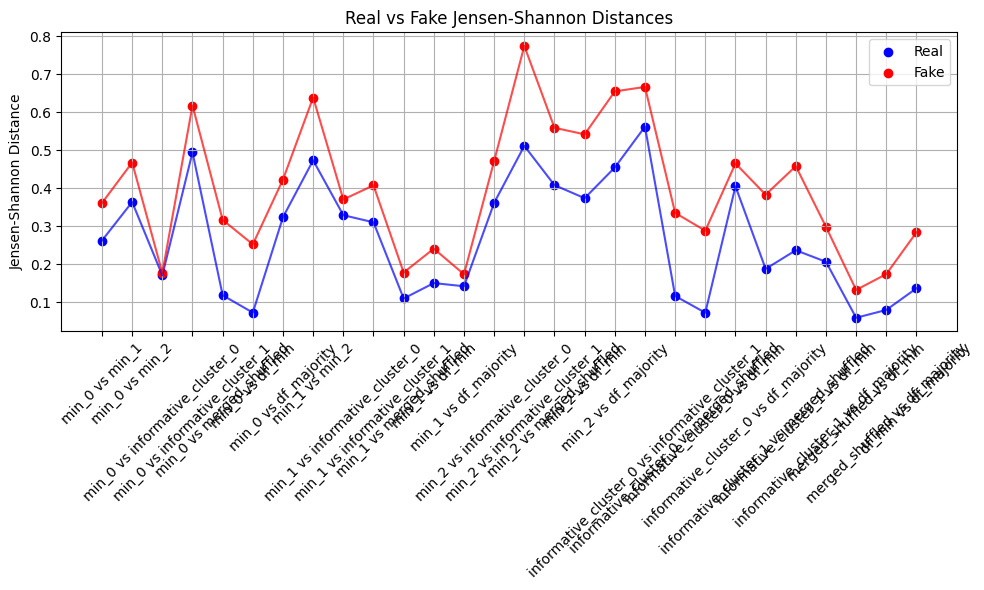

In [52]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import jensenshannon
import matplotlib.pyplot as plt

# File base names
file_names = ["min_0", "min_1", "min_2",df_0,df_1]

# Function to load and process CSV file
def load_cluster(file_path):
    df = pd.read_csv(file_path)
    if "Unnamed: 0" in df.columns:
        df = df.drop(["Unnamed: 0"], axis=1)
    return df.values.mean(axis=1)  # Flatten multivariate to 1D

# Function to compute Jensen-Shannon distance
def compute_js_distance(data1, data2):
    bins = np.histogram_bin_edges(np.concatenate([data1, data2]), bins=50)
    hist1, _ = np.histogram(data1, bins=bins, density=True)
    hist2, _ = np.histogram(data2, bins=bins, density=True)
    p = hist1 / np.sum(hist1)
    q = hist2 / np.sum(hist2)
    return jensenshannon(p, q)

# Store results
real_distances = []
fake_distances = []
labels = []

# Loop through unique file pairs
for i in range(len(file_names)):
    for j in range(i + 1, len(file_names)):
        name1 = file_names[i]
        name2 = file_names[j]
        labels.append(f"{name1} vs {name2}")

        # Real files
        data1 = load_cluster(f"../dataset/{name1}.csv")
        data2 = load_cluster(f"../dataset/{name2}.csv")
        js_real = compute_js_distance(data1, data2)
        real_distances.append(js_real)

        # Fake files
        fake_data1 = load_cluster(f"../dataset/fake_{name1}.csv")
        fake_data2 = load_cluster(f"../dataset/fake_{name2}.csv")
        js_fake = compute_js_distance(fake_data1, fake_data2)
        fake_distances.append(js_fake)

        print(f"{name1} vs {name2} -> Real: {js_real:.4f}, Fake: {js_fake:.4f}")

# Plot results
x = np.arange(len(labels))

plt.figure(figsize=(10, 6))

# Scatter points
plt.scatter(x, real_distances, color='blue', label='Real')
plt.scatter(x, fake_distances, color='red', label='Fake')

# Connect real and fake points with separate lines
plt.plot(x, real_distances, color='blue', linestyle='-', alpha=0.7)
plt.plot(x, fake_distances, color='red', linestyle='-', alpha=0.7)

# Labels and formatting
plt.xticks(x, labels, rotation=45)
plt.ylabel("Jensen-Shannon Distance")
plt.title("Real vs Fake Jensen-Shannon Distances")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


df_majority vs merged_shuffled -> Real: 0.0796, Fake: 0.1739
df_majority vs df_min -> Real: 0.1366, Fake: 0.2839
merged_shuffled vs df_min -> Real: 0.0591, Fake: 0.1324


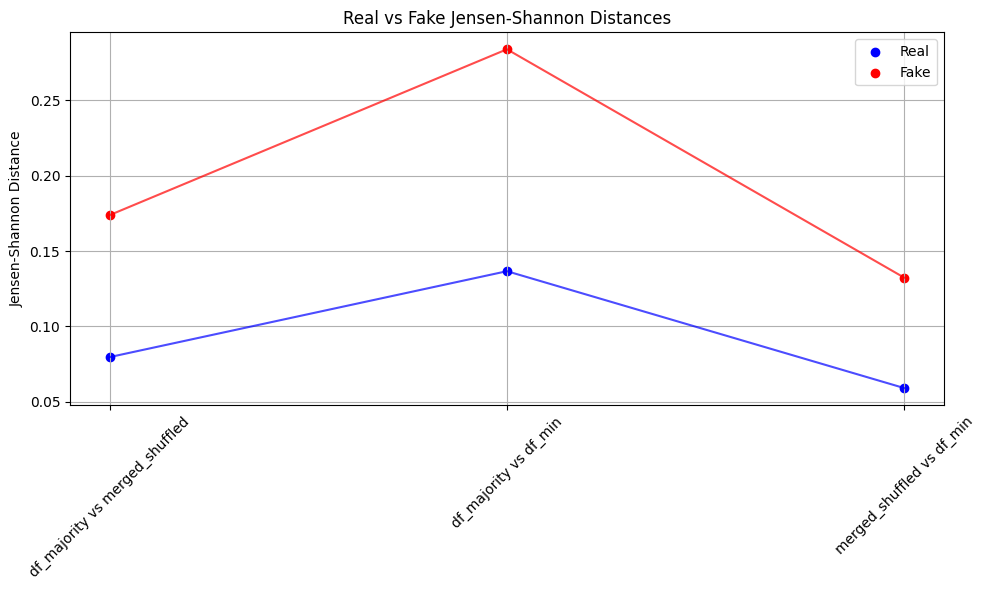

In [55]:
file_names = [df_majority,df_merged,df_m]

# Store results

# Store results
real_distances = []
fake_distances = []
labels = []

# Loop through unique file pairs
for i in range(len(file_names)):
    for j in range(i + 1, len(file_names)):
        name1 = file_names[i]
        name2 = file_names[j]
        labels.append(f"{name1} vs {name2}")

        # Real files
        data1 = load_cluster(f"../dataset/{name1}.csv")
        data2 = load_cluster(f"../dataset/{name2}.csv")
        js_real = compute_js_distance(data1, data2)
        real_distances.append(js_real)

        # Fake files
        fake_data1 = load_cluster(f"../dataset/fake_{name1}.csv")
        fake_data2 = load_cluster(f"../dataset/fake_{name2}.csv")
        js_fake = compute_js_distance(fake_data1, fake_data2)
        fake_distances.append(js_fake)

        print(f"{name1} vs {name2} -> Real: {js_real:.4f}, Fake: {js_fake:.4f}")

# Plot results
x = np.arange(len(labels))

plt.figure(figsize=(10, 6))

# Scatter points
plt.scatter(x, real_distances, color='blue', label='Real')
plt.scatter(x, fake_distances, color='red', label='Fake')

# Connect real and fake points with separate lines
plt.plot(x, real_distances, color='blue', linestyle='-', alpha=0.7)
plt.plot(x, fake_distances, color='red', linestyle='-', alpha=0.7)

# Labels and formatting
plt.xticks(x, labels, rotation=45)
plt.ylabel("Jensen-Shannon Distance")
plt.title("Real vs Fake Jensen-Shannon Distances")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


min_1_min_2_informative_cluster_0_informative_cluster_1 vs min_0_min_2_informative_cluster_0_informative_cluster_1 -> Real: 0.0670, Fake: 0.1455
min_1_min_2_informative_cluster_0_informative_cluster_1 vs min_0_min_1_informative_cluster_0_informative_cluster_1 -> Real: 0.0547, Fake: 0.0958
min_0_min_2_informative_cluster_0_informative_cluster_1 vs min_0_min_1_informative_cluster_0_informative_cluster_1 -> Real: 0.0470, Fake: 0.0746


C:\Users\msi\AppData\Local\Temp\ipykernel_8268\4107785222.py:50: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


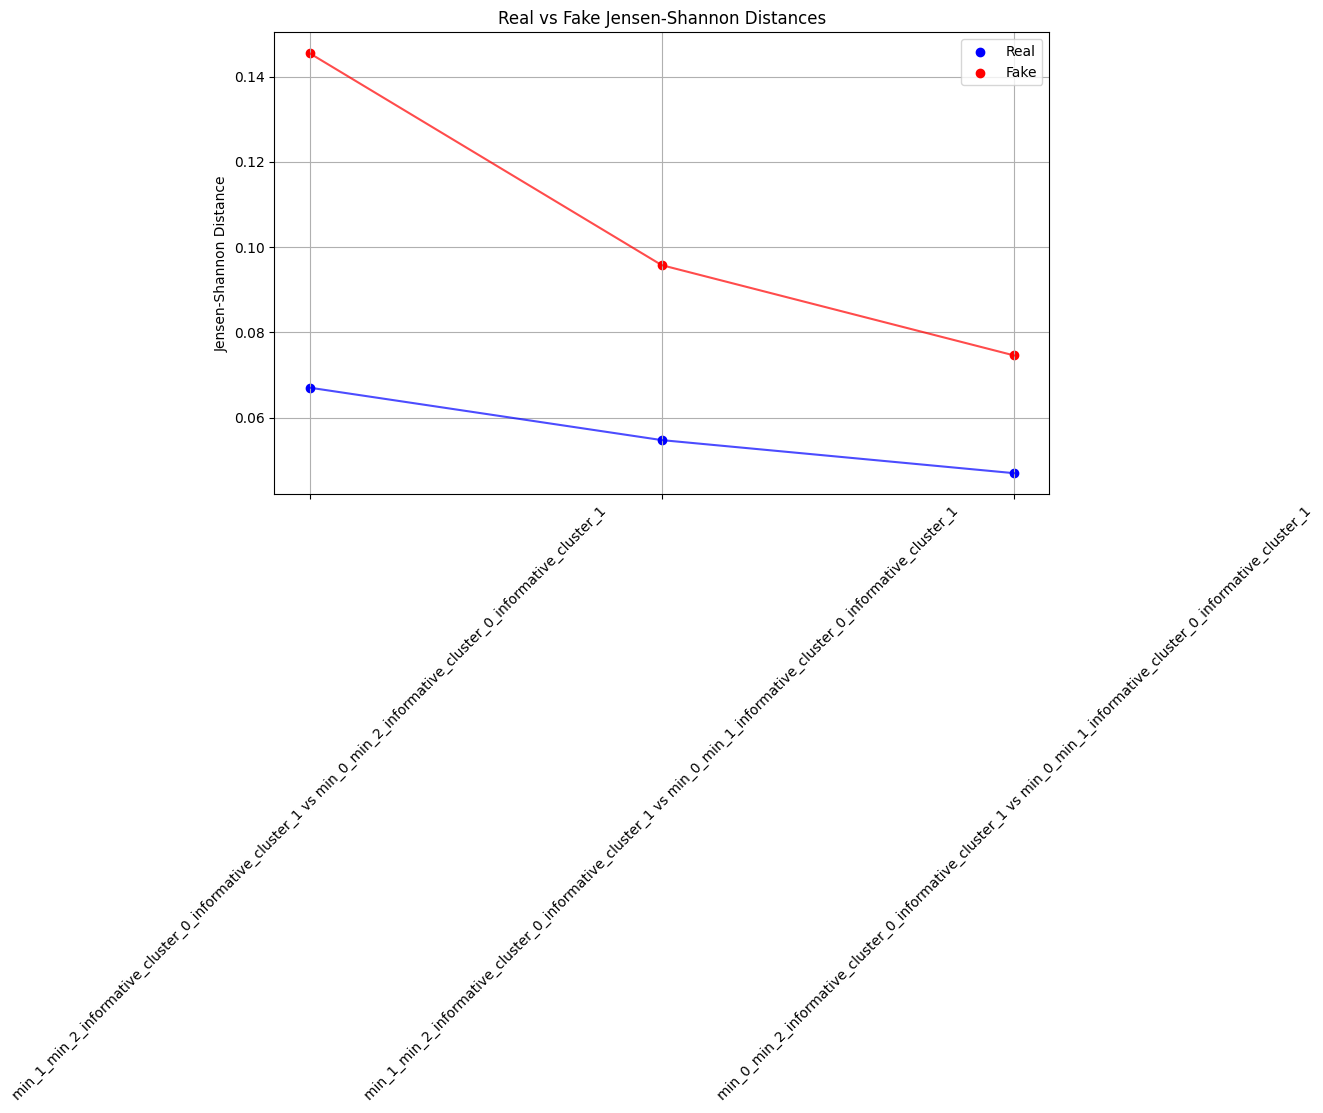

In [56]:
file_names = [df_m_1_df_m_2_df_0_df_1,df_m_0_df_m_2_df_0_df_1,df_m_0_df_m_1_df_0_df_1]

# Store results

# Store results
real_distances = []
fake_distances = []
labels = []

# Loop through unique file pairs
for i in range(len(file_names)):
    for j in range(i + 1, len(file_names)):
        name1 = file_names[i]
        name2 = file_names[j]
        labels.append(f"{name1} vs {name2}")

        # Real files
        data1 = load_cluster(f"../dataset/{name1}.csv")
        data2 = load_cluster(f"../dataset/{name2}.csv")
        js_real = compute_js_distance(data1, data2)
        real_distances.append(js_real)

        # Fake files
        fake_data1 = load_cluster(f"../dataset/fake_{name1}.csv")
        fake_data2 = load_cluster(f"../dataset/fake_{name2}.csv")
        js_fake = compute_js_distance(fake_data1, fake_data2)
        fake_distances.append(js_fake)

        print(f"{name1} vs {name2} -> Real: {js_real:.4f}, Fake: {js_fake:.4f}")

# Plot results
x = np.arange(len(labels))

plt.figure(figsize=(10, 6))

# Scatter points
plt.scatter(x, real_distances, color='blue', label='Real')
plt.scatter(x, fake_distances, color='red', label='Fake')

# Connect real and fake points with separate lines
plt.plot(x, real_distances, color='blue', linestyle='-', alpha=0.7)
plt.plot(x, fake_distances, color='red', linestyle='-', alpha=0.7)

# Labels and formatting
plt.xticks(x, labels, rotation=45)
plt.ylabel("Jensen-Shannon Distance")
plt.title("Real vs Fake Jensen-Shannon Distances")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Jensen-Shannon distance: 0.2290


min_0 vs fake_min_0: 0.2290
min_0 vs fake_min_1: 0.2565
min_0 vs fake_min_2: 0.4907
min_1 vs fake_min_0: 0.3667
min_1 vs fake_min_1: 0.1509
min_1 vs fake_min_2: 0.6306
min_2 vs fake_min_0: 0.4352
min_2 vs fake_min_1: 0.4896
min_2 vs fake_min_2: 0.2061


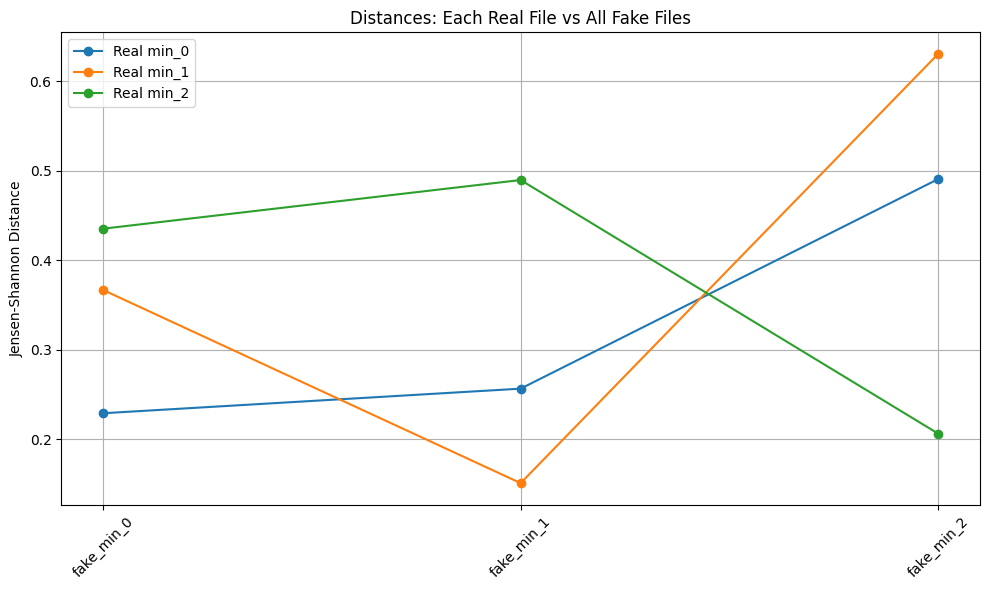

In [57]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import jensenshannon
import matplotlib.pyplot as plt

# Base filenames (real files)
file_names = ["min_0", "min_1", "min_2"]

# Load and reduce each file to 1D mean vector
def load_cluster(file_path):
    df = pd.read_csv(file_path)
    if "Unnamed: 0" in df.columns:
        df = df.drop(["Unnamed: 0"], axis=1)
    return df.values.mean(axis=1)

# Compute Jensen-Shannon distance
def compute_js_distance(data1, data2):
    bins = np.histogram_bin_edges(np.concatenate([data1, data2]), bins=50)
    hist1, _ = np.histogram(data1, bins=bins, density=True)
    hist2, _ = np.histogram(data2, bins=bins, density=True)
    p = hist1 / np.sum(hist1)
    q = hist2 / np.sum(hist2)
    return jensenshannon(p, q)

# Collect all distances
plt.figure(figsize=(10, 6))

x = np.arange(len(file_names))
for i, real_name in enumerate(file_names):
    real_data = load_cluster(f"../dataset/{real_name}.csv")
    distances = []

    for fake_name in file_names:
        fake_data = load_cluster(f"../dataset/fake_{fake_name}.csv")
        dist = compute_js_distance(real_data, fake_data)
        distances.append(dist)
        print(f"{real_name} vs fake_{fake_name}: {dist:.4f}")

    # Plot line for this real file
    plt.plot(x, distances, marker='o', label=f"Real {real_name}")

# Plot formatting
plt.xticks(x, [f"fake_{name}" for name in file_names], rotation=45)
plt.ylabel("Jensen-Shannon Distance")
plt.title("Distances: Each Real File vs All Fake Files")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


df_majority vs fake_df_majority: 0.0982
df_majority vs fake_df_min: 0.2526
df_majority vs fake_merged_shuffled: 0.1863
df_min vs fake_df_majority: 0.1698
df_min vs fake_df_min: 0.1012
df_min vs fake_merged_shuffled: 0.0537
merged_shuffled vs fake_df_majority: 0.1179
merged_shuffled vs fake_df_min: 0.1218
merged_shuffled vs fake_merged_shuffled: 0.0358


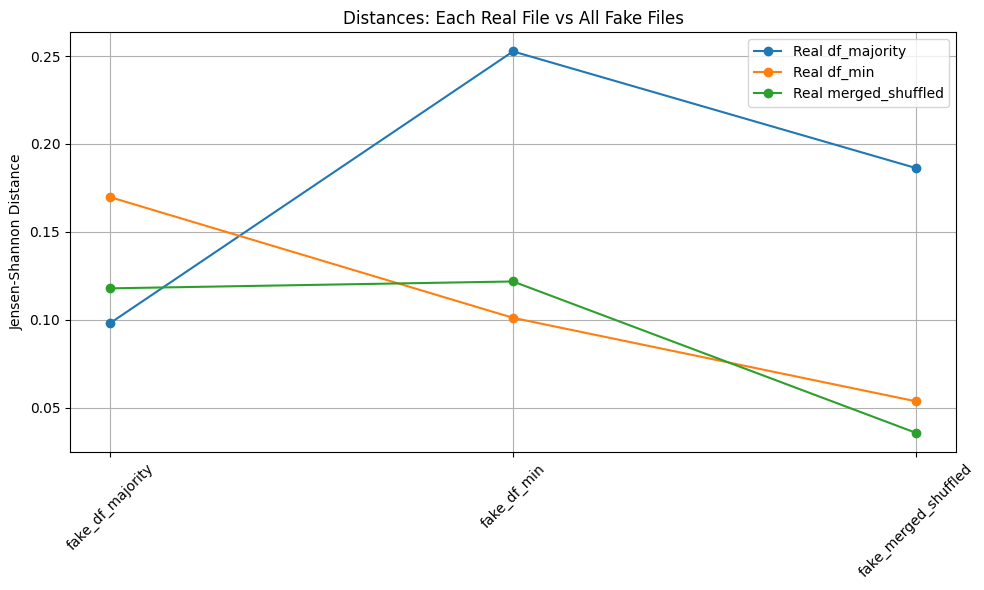

In [59]:
file_names = [df_majority,df_m,df_merged]

# Store results

# Store results
real_distances = []
fake_distances = []
labels = []

# Collect all distances
plt.figure(figsize=(10, 6))

x = np.arange(len(file_names))
for i, real_name in enumerate(file_names):
    real_data = load_cluster(f"../dataset/{real_name}.csv")
    distances = []

    for fake_name in file_names:
        fake_data = load_cluster(f"../dataset/fake_{fake_name}.csv")
        dist = compute_js_distance(real_data, fake_data)
        distances.append(dist)
        print(f"{real_name} vs fake_{fake_name}: {dist:.4f}")

    # Plot line for this real file
    plt.plot(x, distances, marker='o', label=f"Real {real_name}")

# Plot formatting
plt.xticks(x, [f"fake_{name}" for name in file_names], rotation=45)
plt.ylabel("Jensen-Shannon Distance")
plt.title("Distances: Each Real File vs All Fake Files")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

min_0 vs fake_min_0: 0.2290
min_0 vs fake_min_1: 0.2565
min_0 vs fake_min_2: 0.4907
min_0 vs fake_informative_cluster_0: 0.2271
min_0 vs fake_informative_cluster_1: 0.5129
min_0 vs fake_merged_shuffled: 0.1658
min_0 vs fake_df_min: 0.1496
min_0 vs fake_df_majority: 0.3157
min_1 vs fake_min_0: 0.3667
min_1 vs fake_min_1: 0.1509
min_1 vs fake_min_2: 0.6306
min_1 vs fake_informative_cluster_0: 0.4088
min_1 vs fake_informative_cluster_1: 0.3337
min_1 vs fake_merged_shuffled: 0.1463
min_1 vs fake_df_min: 0.2077
min_1 vs fake_df_majority: 0.1103
min_2 vs fake_min_0: 0.4352
min_2 vs fake_min_1: 0.4896
min_2 vs fake_min_2: 0.2061
min_2 vs fake_informative_cluster_0: 0.4075
min_2 vs fake_informative_cluster_1: 0.5114
min_2 vs fake_merged_shuffled: 0.3962
min_2 vs fake_df_min: 0.4103
min_2 vs fake_df_majority: 0.4793
informative_cluster_0 vs fake_min_0: 0.1786
informative_cluster_0 vs fake_min_1: 0.3023
informative_cluster_0 vs fake_min_2: 0.4550
informative_cluster_0 vs fake_informative_cluster

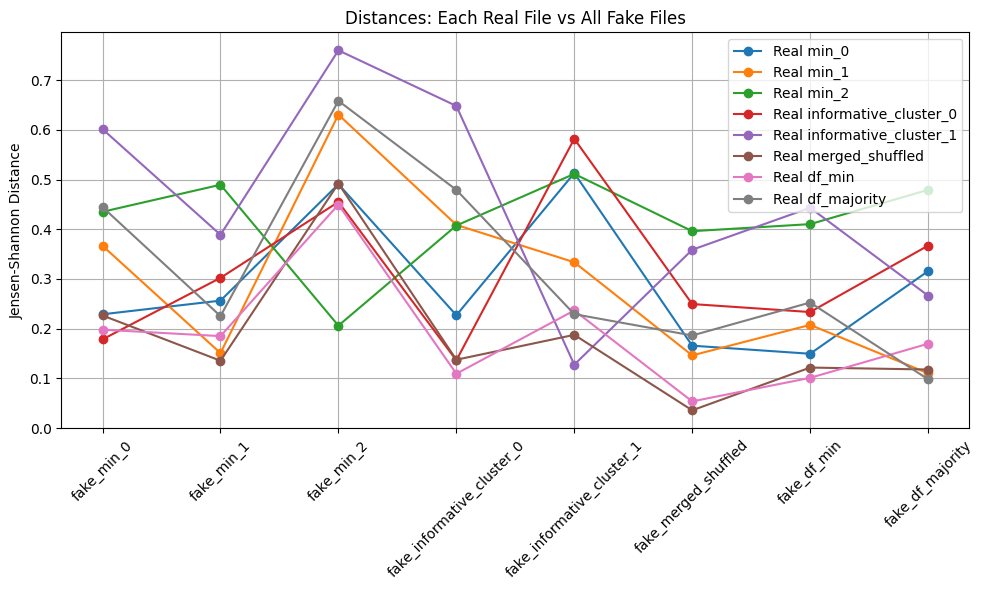

In [62]:
file_names = [df_m_0,df_m_1,df_m_2,df_0,df_1,df_merged,df_m,df_majority]

# Store results

# Store results
real_distances = []
fake_distances = []
labels = []

# Collect all distances
plt.figure(figsize=(10, 6))

x = np.arange(len(file_names))
for i, real_name in enumerate(file_names):
    real_data = load_cluster(f"../dataset/{real_name}.csv")
    distances = []

    for fake_name in file_names:
        fake_data = load_cluster(f"../dataset/fake_{fake_name}.csv")
        dist = compute_js_distance(real_data, fake_data)
        distances.append(dist)
        print(f"{real_name} vs fake_{fake_name}: {dist:.4f}")

    # Plot line for this real file
    plt.plot(x, distances, marker='o', label=f"Real {real_name}")

# Plot formatting
plt.xticks(x, [f"fake_{name}" for name in file_names], rotation=45)
plt.ylabel("Jensen-Shannon Distance")
plt.title("Distances: Each Real File vs All Fake Files")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()